In [ ]:
print("Shree Ganeshayaa Namaha")

Shree Ganeshayaa Namaha


***Import reqd package***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

**Data Preprocessing and EDA**

In [ ]:
# Load the dataset
df = pd.read_csv('expanded_social_media_user_data.csv')

# Step 1: Data Preprocessing - One-Hot Encoding for categorical variables
encoder = OneHotEncoder()  # Use default sparse=True
encoded_features = encoder.fit_transform(df[['location', 'content_liked', 'interest']]).toarray()  # Convert to dense array

# Combine the encoded features with the numerical 'age' column
processed_features = np.hstack((df[['age']].values, encoded_features))

**Function for K- mean Clustering**

In [ ]:
# Step 2: Implementing K-Means Clustering Manually
def kmeans_manual(data, n_clusters, max_iters=100):
    # Step 2.1: Initialize centroids randomly
    random_indices = np.random.choice(data.shape[0], n_clusters, replace=False)
    centroids = data[random_indices]

    for _ in range(max_iters):
        # Step 2.2: Assign clusters
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)  # Calculate distance to centroids
        labels = np.argmin(distances, axis=1)  # Assign closest centroid

        # Step 2.3: Update centroids by calculting mean
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Step 2.4: Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

**Function for Applying K - mean and evaluating**

In [ ]:
# Step 3: Apply K-Means and Evaluate
def evaluate_and_visualize_clusters(processed_features, n_clusters):
    centroids, labels = kmeans_manual(processed_features, n_clusters)

    # Compute the Silhouette Score using sklearn
    silhouette_avg = silhouette_score(processed_features, labels)
    print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')

    # Reduce to 2D using PCA for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(processed_features)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title(f'Clusters Visualization with {n_clusters} Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.grid(True)
    plt.show()

    return centroids, labels

**Function to visualize**

In [ ]:
# Step 4: Visualizing Cluster Distribution
def plot_cluster_distribution(labels):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(8, 6))
    plt.bar(unique, counts, tick_label=[f'Cluster {i}' for i in unique], color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Data Points')
    plt.title('Cluster Distribution')
    plt.grid(axis='y')
    plt.show()

**Lets first see our dataset **

In [ ]:
print(df.head())

   user_id  age location   content_liked interest
0     3982    3    India  Music for Kids    Music
1     9097    4       UK  Music for Kids     Toys
2     9127    1       UK      Pet Videos    Music
3     8213    3   France     Toy Reviews     Toys
4     4656    3       UK      Pet Videos     Toys


**Function to plot Elbow method**

In [ ]:
# Step 2: Plot Elbow Method to determine optimal number of clusters
def plot_elbow_method(processed_features):
    inertia_list = []
    K = range(1, 11)  # Try from 1 to 10 clusters
    for k in K:
        centroids, _ = kmeans_manual(processed_features, k)
        distances = np.linalg.norm(processed_features[:, np.newaxis] - centroids, axis=2)
        min_distances = np.min(distances, axis=1)
        inertia = np.sum(min_distances ** 2)
        inertia_list.append(inertia)

    # Plot the Elbow Method
    plt.figure(figsize=(8, 6))
    plt.plot(K, inertia_list, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

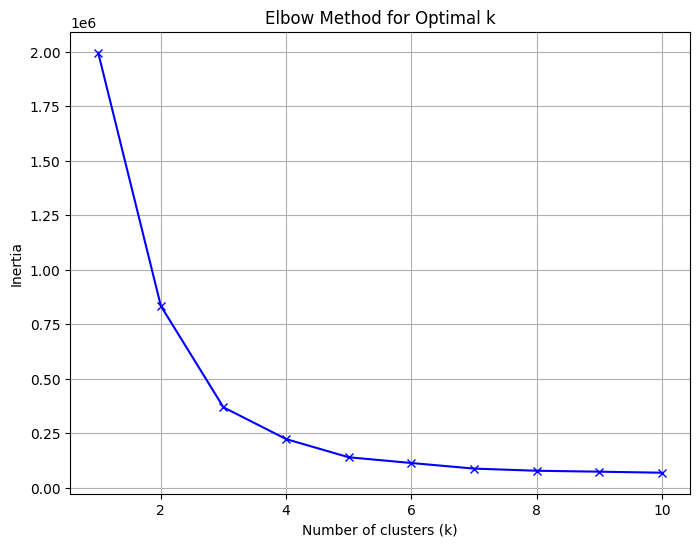

Silhouette Score for 4 clusters: 0.527


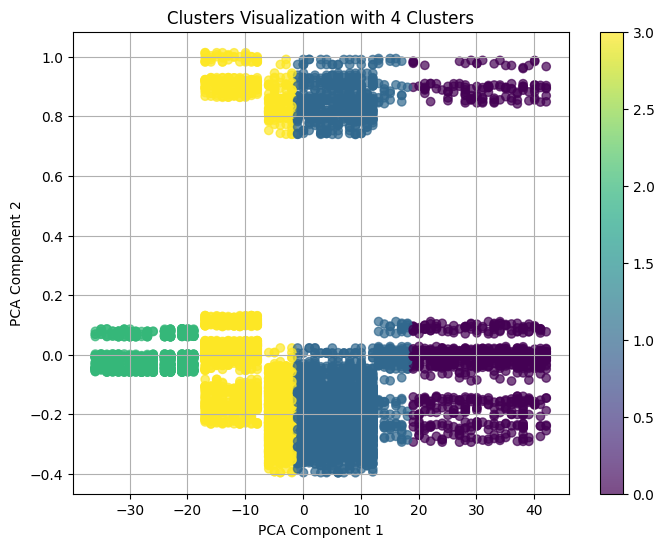

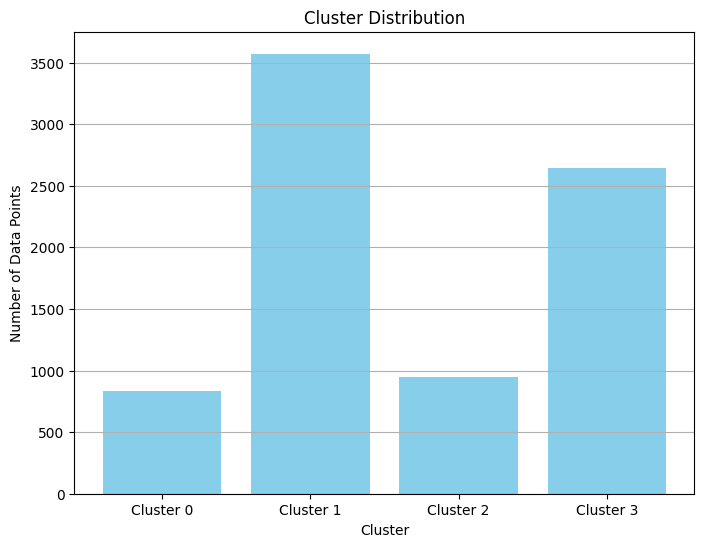

In [ ]:


# Step 2: Plot Elbow Method to determine optimal number of clusters
plot_elbow_method(processed_features)

# Step 3: After analyzing the Elbow Method, assume optimal k = 4
centroids, labels = evaluate_and_visualize_clusters(processed_features, n_clusters=4)

# Step 4: Plot cluster distribution
plot_cluster_distribution(labels)
